/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code
/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461
======iteration0=========
std=0.01:2.302538739285376
Xavier:2.2993681007292825
He:2.3115926782765386
======iteration100=========
std=0.01:2.302063520513986
Xavier:2.2573081685703213
He:1.5072891569397673
======iteration200=========
std=0.01:2.301589654369203
Xavier:2.1829070496568828
He:0.7489475927587657
======iteration300=========
std=0.01:2.303983323293669
Xavier:2.0336322646515557
He:0.6477263728846501
======iteration400=========
std=0.01:2.297251017329989
Xavier:1.6605399395742668
He:0.410778396267224
======iteration500=========
std=0.01:2.301620838494097
Xavier:1.081956763857983
He:0.43832725488523067
======iteration600=========
std=0.01:2.3052641050857696
Xavier:0.9373505824212489
He:0.4098878125148143
======iteration700=========
std=0.01:2.2978244049136087
Xavier:0.663744303041923
He:0.29026839472396804
======iteration800=========
std=0.01:2.305532974952078

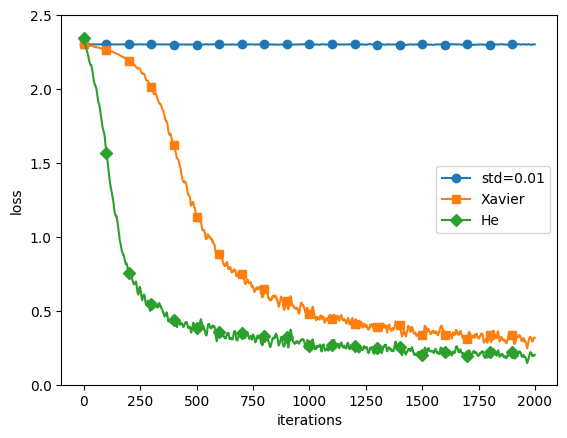

In [5]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)#정규화로 가져오는거네

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


#실험용 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size = 784, hidden_size_list=[100, 100, 100, 100],
                                    output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


#훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("======" + "iteration" + str(i) + "=========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


#그래프 그리기

markers = {'std=0.01': 'o', 'Xavier':'s', 'He' : 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0,2.5)
plt.legend()
plt.show()






